In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
filePath = '/content/drive/MyDrive/ADS2005/'

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройки визуализации
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/ADS2005/sales_data.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [42]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


ОБЩАЯ СТАТИСТИКА ПРОДАЖ

1. СТАТИСТИКА ПО МЕНЕДЖЕРАМ:
           Total_Sales  Average_Sale  Transaction_Count  Total_Quantity  Avg_Discount
Sales_Rep                                                                            
David       1141737.36       5142.96                222            6042          0.16
Bob         1080990.63       5197.07                208            4977          0.14
Eve          970183.99       4642.03                209            5287          0.16
Alice        965541.77       5028.86                192            4832          0.14
Charlie      860811.48       5093.56                169            4217          0.16

2. СТАТИСТИКА ПО РЕГИОНАМ:
        Total_Sales  Average_Sale  Total_Quantity  Avg_Discount
Region                                                         
North    1369612.51       5129.63            6705          0.15
East     1259792.93       4790.09            6356          0.16
West     1235608.93       5063.97            6486          0

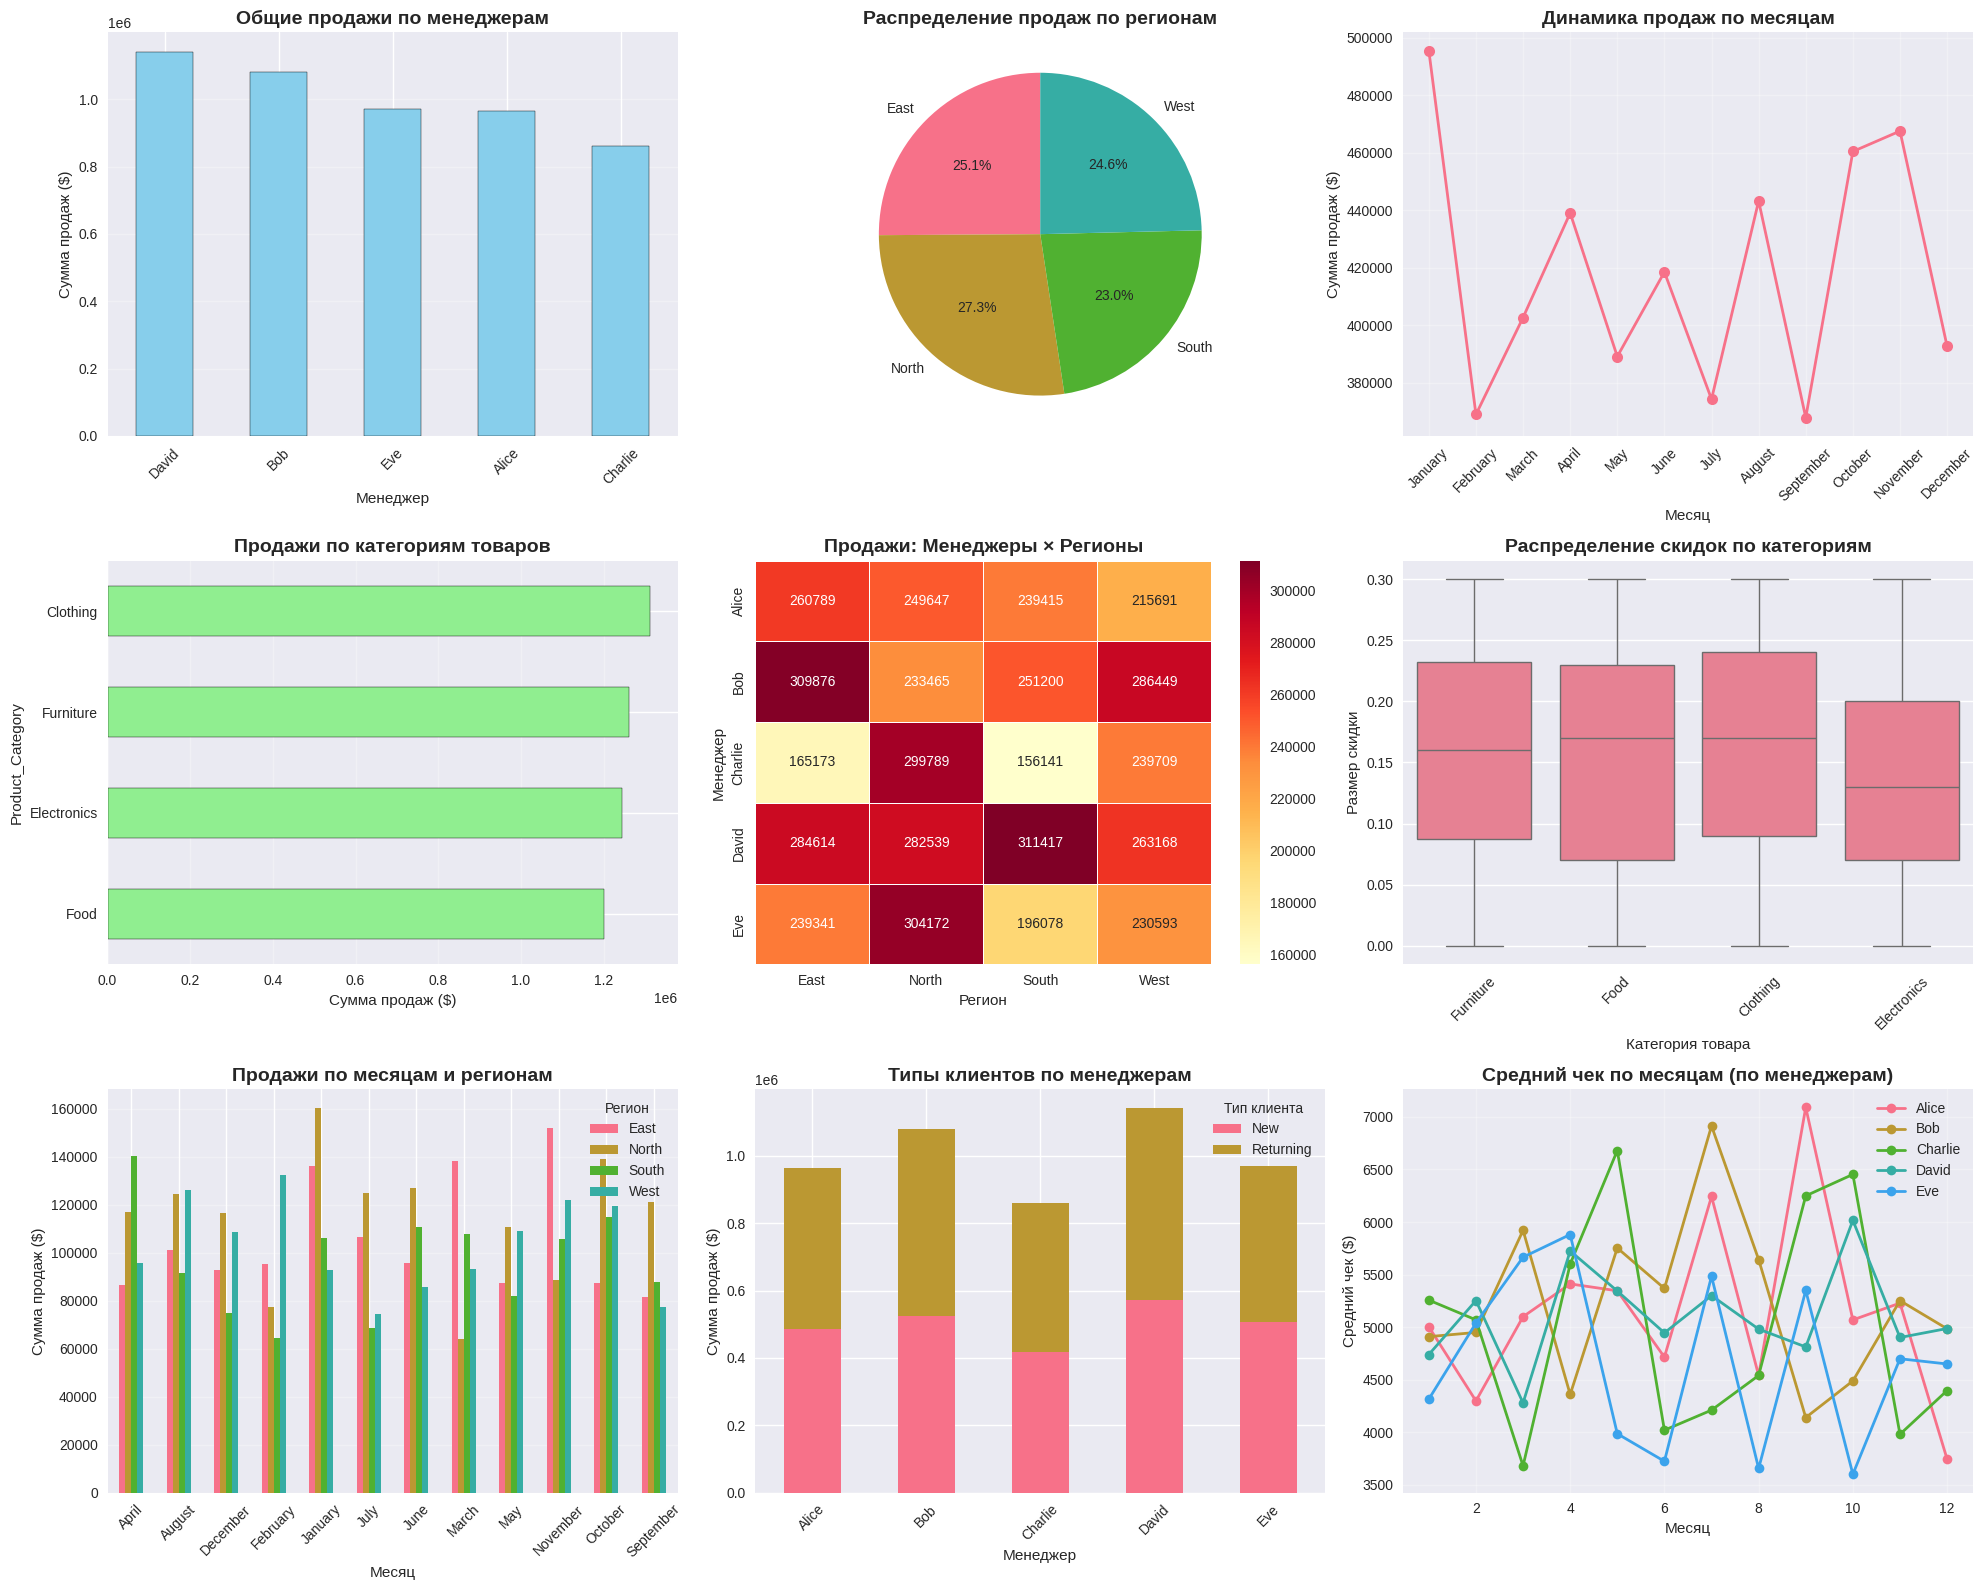


ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ


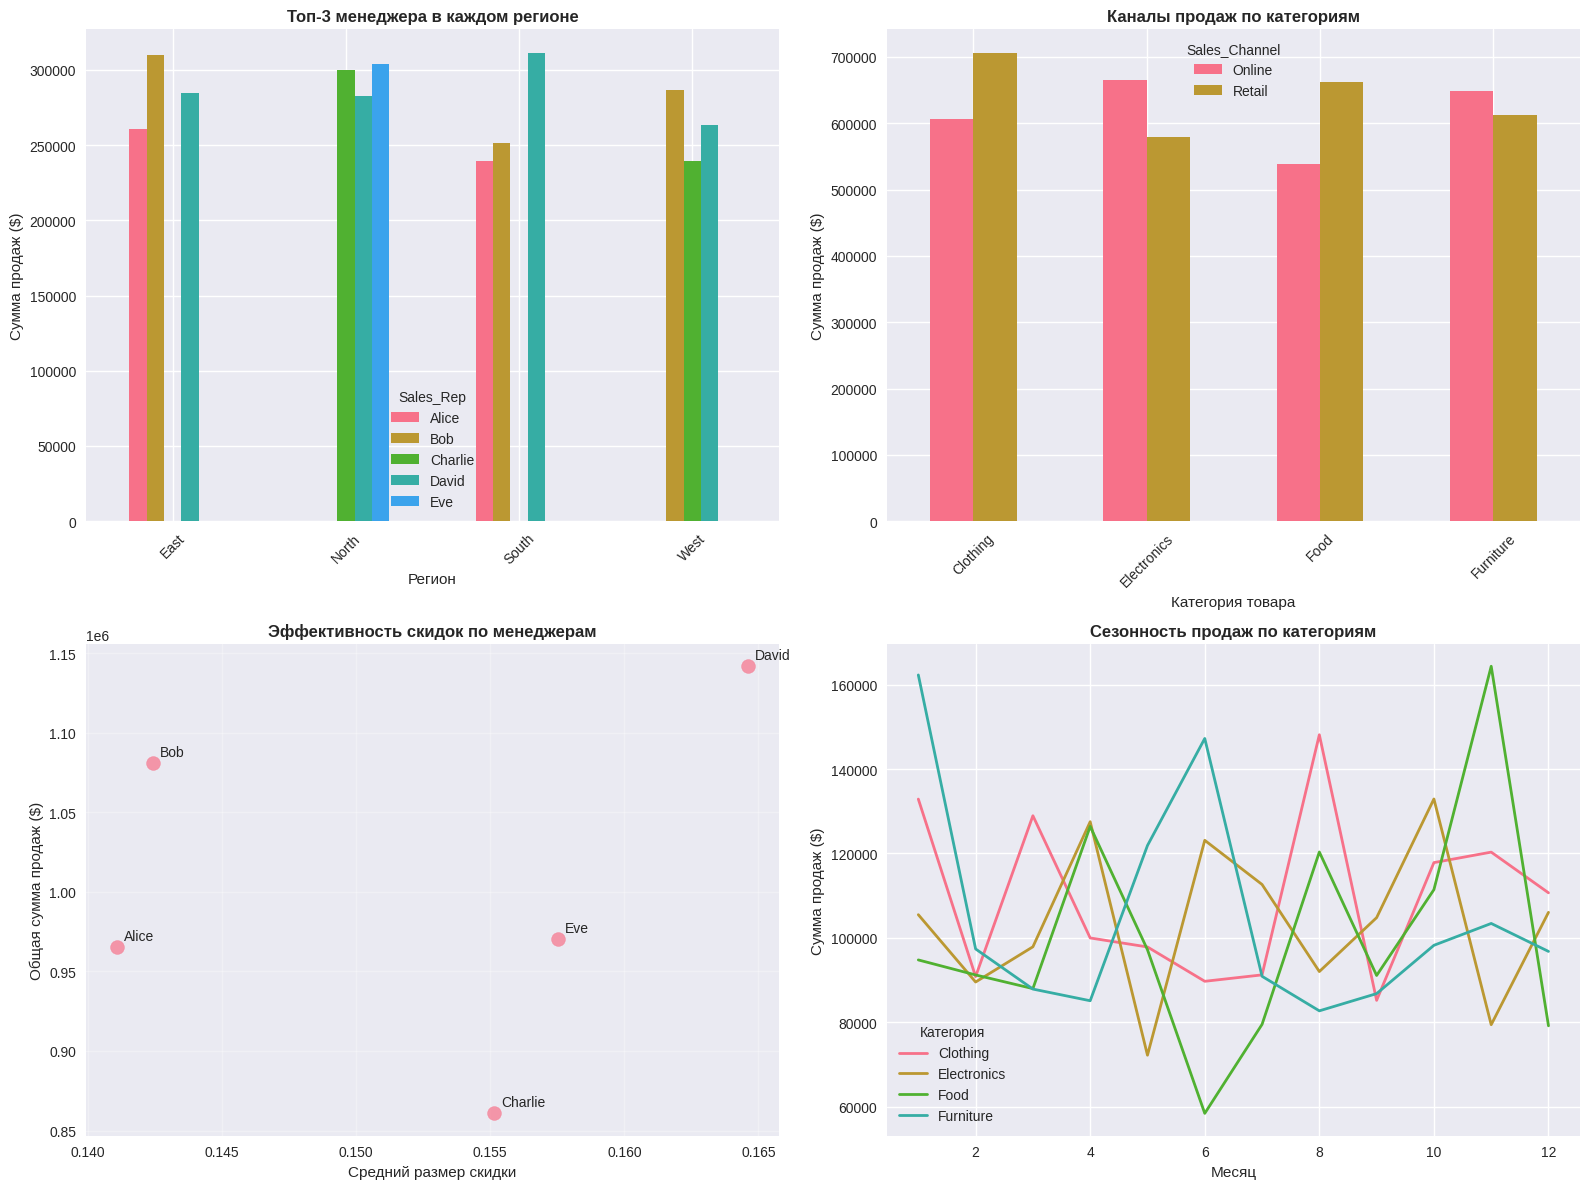


КЛЮЧЕВЫЕ ВЫВОДЫ
📍 ЛУЧШИЙ МЕНЕДЖЕР: David (1,141,737 $)
📍 ЛУЧШИЙ РЕГИОН: North (1,369,613 $)
📍 ЛУЧШИЙ МЕСЯЦ: January (495,420 $)
📍 ЛУЧШАЯ КАТЕГОРИЯ: Clothing (1,313,474 $)

📊 ОБЩАЯ СУММА ПРОДАЖ: 5,019,265 $
📊 СРЕДНИЙ ЧЕК: 5019 $
📊 КОЛИЧЕСТВО ТРАНЗАКЦИЙ: 1,000
📊 СРЕДНЯЯ СКИДКА: 15.2%

РЕКОМЕНДАЦИИ
1. Сфокусироваться на лучших практиках менеджера David
2. Усилить присутствие в регионе North
3. Оптимизировать ассортимент в категории Clothing
4. Проанализировать пиковые месяцы для планирования запасов


In [43]:
# Преобразование даты
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Month'] = df['Sale_Date'].dt.month
df['Month_Name'] = df['Sale_Date'].dt.month_name()

# Создаем сводные таблицы для анализа
print("="*60)
print("ОБЩАЯ СТАТИСТИКА ПРОДАЖ")
print("="*60)

# 1. Сводка по менеджерам
manager_stats = df.groupby('Sales_Rep').agg({
    'Sales_Amount': ['sum', 'mean', 'count'],
    'Quantity_Sold': 'sum',
    'Discount': 'mean'
}).round(2)

manager_stats.columns = ['Total_Sales', 'Average_Sale', 'Transaction_Count', 'Total_Quantity', 'Avg_Discount']
print("\n1. СТАТИСТИКА ПО МЕНЕДЖЕРАМ:")
print(manager_stats.sort_values('Total_Sales', ascending=False))

# 2. Сводка по регионам
region_stats = df.groupby('Region').agg({
    'Sales_Amount': ['sum', 'mean'],
    'Quantity_Sold': 'sum',
    'Discount': 'mean'
}).round(2)

region_stats.columns = ['Total_Sales', 'Average_Sale', 'Total_Quantity', 'Avg_Discount']
print("\n2. СТАТИСТИКА ПО РЕГИОНАМ:")
print(region_stats.sort_values('Total_Sales', ascending=False))

# 3. Сводка по месяцам
monthly_stats = df.groupby(['Month', 'Month_Name']).agg({
    'Sales_Amount': 'sum',
    'Quantity_Sold': 'sum'
}).round(2).reset_index().sort_values('Month')

print("\n3. СТАТИСТИКА ПО МЕСЯЦАМ:")
print(monthly_stats[['Month_Name', 'Sales_Amount', 'Quantity_Sold']])

# 4. Сводка по категориям товаров
category_stats = df.groupby('Product_Category').agg({
    'Sales_Amount': ['sum', 'mean'],
    'Quantity_Sold': 'sum',
    'Unit_Price': 'mean'
}).round(2)

category_stats.columns = ['Total_Sales', 'Average_Sale', 'Total_Quantity', 'Avg_Unit_Price']
print("\n4. СТАТИСТИКА ПО КАТЕГОРИЯМ ТОВАРОВ:")
print(category_stats.sort_values('Total_Sales', ascending=False))

# ВИЗУАЛИЗАЦИЯ
print("\n" + "="*60)
print("ГРАФИКИ И ДИАГРАММЫ")
print("="*60)

# Создаем сетку графиков
fig = plt.figure(figsize=(20, 16))

# 1. Продажи по менеджерам (столбчатая диаграмма)
plt.subplot(3, 3, 1)
manager_sales = df.groupby('Sales_Rep')['Sales_Amount'].sum().sort_values(ascending=False)
manager_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Общие продажи по менеджерам', fontsize=14, fontweight='bold')
plt.xlabel('Менеджер')
plt.ylabel('Сумма продаж ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 2. Продажи по регионам (круговая диаграмма)
plt.subplot(3, 3, 2)
region_sales = df.groupby('Region')['Sales_Amount'].sum()
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение продаж по регионам', fontsize=14, fontweight='bold')

# 3. Динамика продаж по месяцам (линейный график)
plt.subplot(3, 3, 3)
monthly_trend = df.groupby(['Month', 'Month_Name'])['Sales_Amount'].sum().reset_index()
plt.plot(monthly_trend['Month_Name'], monthly_trend['Sales_Amount'], marker='o', linewidth=2, markersize=8)
plt.title('Динамика продаж по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 4. Продажи по категориям товаров (горизонтальная столбчатая)
plt.subplot(3, 3, 4)
category_sales = df.groupby('Product_Category')['Sales_Amount'].sum().sort_values()
category_sales.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Продажи по категориям товаров', fontsize=14, fontweight='bold')
plt.xlabel('Сумма продаж ($)')
plt.grid(axis='x', alpha=0.3)

# 5. Тепловая карта: Менеджеры × Регионы
plt.subplot(3, 3, 5)
pivot_sales = df.pivot_table(values='Sales_Amount', index='Sales_Rep', columns='Region', aggfunc='sum', fill_value=0)
sns.heatmap(pivot_sales, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
plt.title('Продажи: Менеджеры × Регионы', fontsize=14, fontweight='bold')
plt.xlabel('Регион')
plt.ylabel('Менеджер')

# 6. Распределение скидок по категориям (боксплот)
plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='Product_Category', y='Discount')
plt.title('Распределение скидок по категориям', fontsize=14, fontweight='bold')
plt.xlabel('Категория товара')
plt.ylabel('Размер скидки')
plt.xticks(rotation=45)

# 7. Продажи по месяцам и регионам (группированная столбчатая)
plt.subplot(3, 3, 7)
month_region_sales = df.groupby(['Month_Name', 'Region'])['Sales_Amount'].sum().unstack()
month_region_sales.plot(kind='bar', ax=plt.gca())
plt.title('Продажи по месяцам и регионам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж ($)')
plt.xticks(rotation=45)
plt.legend(title='Регион')
plt.grid(axis='y', alpha=0.3)

# 8. Соотношение новых и постоянных клиентов по менеджерам
plt.subplot(3, 3, 8)
customer_type_pivot = df.pivot_table(values='Sales_Amount', index='Sales_Rep', columns='Customer_Type', aggfunc='sum', fill_value=0)
customer_type_pivot.plot(kind='bar', ax=plt.gca(), stacked=True)
plt.title('Типы клиентов по менеджерам', fontsize=14, fontweight='bold')
plt.xlabel('Менеджер')
plt.ylabel('Сумма продаж ($)')
plt.xticks(rotation=45)
plt.legend(title='Тип клиента')

# 9. Средний чек по месяцам для каждого менеджера
plt.subplot(3, 3, 9)
manager_month_avg = df.pivot_table(values='Sales_Amount', index='Month', columns='Sales_Rep', aggfunc='mean', fill_value=0)
for manager in manager_month_avg.columns:
    plt.plot(manager_month_avg.index, manager_month_avg[manager], marker='o', label=manager, linewidth=2)
plt.title('Средний чек по месяцам (по менеджерам)', fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Средний чек ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ДОПОЛНИТЕЛЬНЫЙ УГЛУБЛЕННЫЙ АНАЛИЗ
print("\n" + "="*60)
print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ")
print("="*60)

# Анализ эффективности менеджеров по регионам и категориям
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Топ-менеджеры в каждом регионе
plt.sca(axes[0, 0])
top_managers_by_region = df.groupby(['Region', 'Sales_Rep'])['Sales_Amount'].sum().groupby('Region').nlargest(3).reset_index(level=0, drop=True)
top_managers_by_region.unstack().plot(kind='bar', ax=axes[0, 0])
plt.title('Топ-3 менеджера в каждом регионе', fontweight='bold')
plt.xlabel('Регион')
plt.ylabel('Сумма продаж ($)')
plt.xticks(rotation=45)

# Распределение каналов продаж по категориям
plt.sca(axes[0, 1])
channel_category = df.pivot_table(values='Sales_Amount', index='Product_Category', columns='Sales_Channel', aggfunc='sum', fill_value=0)
channel_category.plot(kind='bar', ax=axes[0, 1])
plt.title('Каналы продаж по категориям', fontweight='bold')
plt.xlabel('Категория товара')
plt.ylabel('Сумма продаж ($)')
plt.xticks(rotation=45)

# Эффективность скидок по менеджерам
plt.sca(axes[1, 0])
discount_efficiency = df.groupby('Sales_Rep').agg({
    'Discount': 'mean',
    'Sales_Amount': 'sum'
})
plt.scatter(discount_efficiency['Discount'], discount_efficiency['Sales_Amount'], s=100, alpha=0.7)
for i, manager in enumerate(discount_efficiency.index):
    plt.annotate(manager, (discount_efficiency['Discount'][i], discount_efficiency['Sales_Amount'][i]),
                 xytext=(5, 5), textcoords='offset points')
plt.title('Эффективность скидок по менеджерам', fontweight='bold')
plt.xlabel('Средний размер скидки')
plt.ylabel('Общая сумма продаж ($)')
plt.grid(True, alpha=0.3)

# Сезонность по категориям товаров
plt.sca(axes[1, 1])
seasonal_categories = df.pivot_table(values='Sales_Amount', index='Month', columns='Product_Category', aggfunc='sum', fill_value=0)
seasonal_categories.plot(ax=axes[1, 1], linewidth=2)
plt.title('Сезонность продаж по категориям', fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж ($)')
plt.legend(title='Категория')

plt.tight_layout()
plt.show()

# ВЫВОДЫ И СТАТИСТИКА
print("\n" + "="*60)
print("КЛЮЧЕВЫЕ ВЫВОДЫ")
print("="*60)

# Находим лучших performers
best_manager = manager_stats['Total_Sales'].idxmax()
best_region = region_stats['Total_Sales'].idxmax()
best_month = monthly_stats.loc[monthly_stats['Sales_Amount'].idxmax(), 'Month_Name']
best_category = category_stats['Total_Sales'].idxmax()

print(f"📍 ЛУЧШИЙ МЕНЕДЖЕР: {best_manager} ({manager_stats.loc[best_manager, 'Total_Sales']:,.0f} $)")
print(f"📍 ЛУЧШИЙ РЕГИОН: {best_region} ({region_stats.loc[best_region, 'Total_Sales']:,.0f} $)")
print(f"📍 ЛУЧШИЙ МЕСЯЦ: {best_month} ({monthly_stats['Sales_Amount'].max():,.0f} $)")
print(f"📍 ЛУЧШАЯ КАТЕГОРИЯ: {best_category} ({category_stats.loc[best_category, 'Total_Sales']:,.0f} $)")

# Анализ эффективности
print(f"\n📊 ОБЩАЯ СУММА ПРОДАЖ: {df['Sales_Amount'].sum():,.0f} $")
print(f"📊 СРЕДНИЙ ЧЕК: {df['Sales_Amount'].mean():.0f} $")
print(f"📊 КОЛИЧЕСТВО ТРАНЗАКЦИЙ: {len(df):,}")
print(f"📊 СРЕДНЯЯ СКИДКА: {df['Discount'].mean():.1%}")

# Рекомендации
print("\n" + "="*60)
print("РЕКОМЕНДАЦИИ")
print("="*60)
print("1. Сфокусироваться на лучших практиках менеджера", best_manager)
print("2. Усилить присутствие в регионе", best_region)
print("3. Оптимизировать ассортимент в категории", best_category)
print("4. Проанализировать пиковые месяцы для планирования запасов")